# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [326]:
dataframe = pd.read_excel("data.xlsx")

In [327]:
dataframe.head()

,Name,Post frequently,Active,Replies,No. of followers,Personality
0,Aaron,0,1,0,413,0
1,Kim,0,1,1,372,1
2,Arah,0,1,0,657,0
3,Yanna,1,1,1,416,1
4,Tine,0,1,0,1100,0


In [328]:
dataframe.drop(columns='Name', inplace=True)
dataframe.head()

,Post frequently,Active,Replies,No. of followers,Personality
0,0,1,0,413,0
1,0,1,1,372,1
2,0,1,0,657,0
3,1,1,1,416,1
4,0,1,0,1100,0


1. Display the summary of all the features of the dataset using `.info()`

In [329]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Post frequently   55 non-null     int64
 1   Active            55 non-null     int64
 2   Replies           55 non-null     int64
 3   No. of followers  55 non-null     int64
 4   Personality       55 non-null     int64
dtypes: int64(5)
memory usage: 2.3 KB


2. Display the total number of samples from each label using `.value_counts()`

In [330]:
dataframe['Personality'].value_counts()

,count
Personality,
0,31
1,24


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [331]:
X = dataframe.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [332]:
y = dataframe['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44, 4)
(44,)
(11, 4)
(11,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [334]:
knn = KNeighborsClassifier(n_neighbors=10)

7. Train the model using the `.fit()`

In [335]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

8. Test the model using the `.predict()`

In [336]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

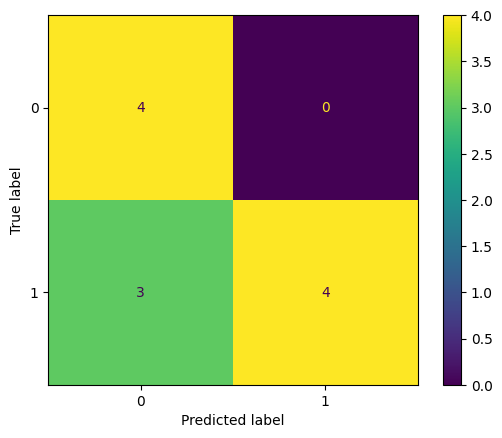

In [337]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [338]:
metrics.accuracy_score(y_test, y_pred)

0.7272727272727273

11. Display the precision

In [339]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1.         0.57142857]


12. Display the recall

In [340]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.57142857 1.        ]


13. Display the f1-score

In [341]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.72727273 0.72727273]


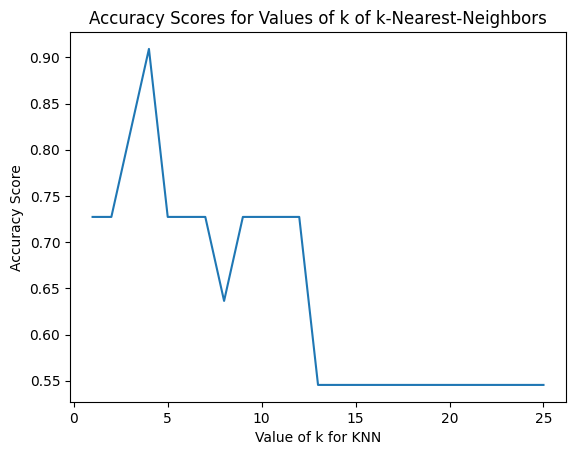

In [342]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [344]:
knn.predict([[0,1,0,1000]])

array([0])